### Importação de Bibliotecas

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Carregamento e Pré-Processamento dos Dados

In [ ]:
# Carregar o dataset
data = pd.read_csv("heart-disease.csv")

# Separar features e rótulo
X = data.drop("target", axis=1)
y = data["target"]

# Verificar a distribuição das classes
print(y.value_counts())

# Configurar a validação cruzada estratificada com 5 folds e shuffle
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

target
1    165
0    138
Name: count, dtype: int64


### Exercício 1

In [38]:
# Definir os modelos
knn = KNeighborsClassifier(n_neighbors=5)  # Modelo kNN com k=5
nb = GaussianNB()  # Modelo Naïve Bayes Gaussiano

#### Alínea a)

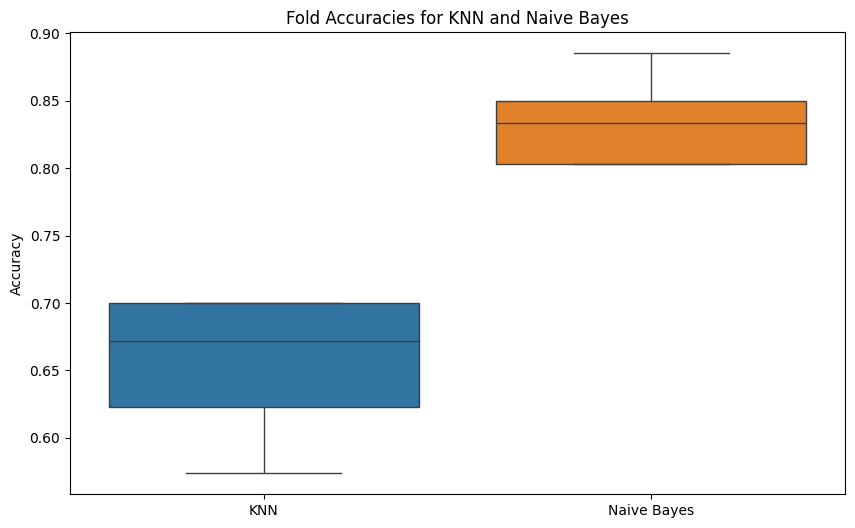

Média da acurácia - KNN: 0.6538 ± 0.0489
Média da acurácia - Naive Bayes: 0.8350 ± 0.0309


In [39]:
# Avaliar o desempenho dos modelos usando cross_val_score para cada fold
knn_scores = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')
nb_scores = cross_val_score(nb, X, y, cv=skf, scoring='accuracy')

# Criar o dataframe para os resultados
results = pd.DataFrame({
    'KNN': knn_scores,
    'Naive Bayes': nb_scores
})

# Representar graficamente os boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=results)
plt.title("Fold Accuracies for KNN and Naive Bayes")
plt.ylabel("Accuracy")
plt.show()

# Imprimir as médias e desvios padrão
print(f"Média da acurácia - KNN: {knn_scores.mean():.4f} ± {knn_scores.std():.4f}")
print(f"Média da acurácia - Naive Bayes: {nb_scores.mean():.4f} ± {nb_scores.std():.4f}")

Através do gráfico, podemos observar que o naïve Bayes apresenta um desempenho mais estável do que o kNN, evidenciado pelo menor desvio padrão das acurácias ao longo dos diferentes folds da validação cruzada (0,0309 para o naïve Bayes contra 0,0489 para o kNN). Isto indica que o naïve Bayes tem menos variação no desempenho entre os diferentes subconjuntos de treino e teste, tornando-o mais consistente e previsível.

A estabilidade do naïve Bayes deve-se, em grande parte, ao facto de ser um modelo probabilístico que assume independência condicional entre as variáveis. Esta suposição simplifica o processo de decisão, tornando o modelo menos sensível a variações ou ruído nos dados. Além disso, por ser um modelo que calcula probabilidades, o naïve Bayes tende a generalizar bem, mesmo em conjuntos de dados mais pequenos ou menos representativos. Assim, consegue obter resultados mais uniformes tanto no conjunto de treino como no de teste, independentemente das variações nos dados.

Em contraste, o kNN é um modelo baseado em distâncias, o que o torna mais suscetível a variações nos dados, como ruído ou a presença de características irrelevantes. Como as suas previsões dependem fortemente da estrutura local dos dados de treino, este pode ter um comportamento inconsistente no conjunto de teste, especialmente quando há poucas amostras ou quando estas não representam bem a distribuição real dos dados. Isso, claro, resulta numa maior variabilidade de desempenho entre os diferentes folds, traduzindo-se num desvio padrão mais elevado na acurácia.


#### Alínea b)

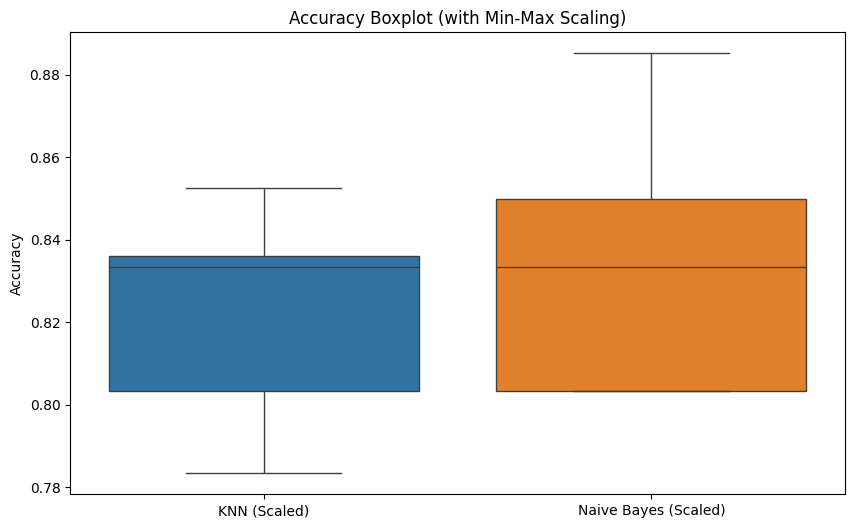

Média da acurácia - KNN (Scaled): 0.8217 ± 0.0249
Média da acurácia - Naive Bayes (Scaled): 0.8350 ± 0.0309


In [40]:
# Aplicar Min-Max Scaler para escalonamento das features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Avaliar o desempenho dos modelos usando cross_val_score com dados escalonados
knn_scores_scaled = cross_val_score(knn, X_scaled, y, cv=skf, scoring='accuracy')
nb_scores_scaled = cross_val_score(nb, X_scaled, y, cv=skf, scoring='accuracy')

# Criar o dataframe para os resultados escalonados
results_scaled = pd.DataFrame({
    'KNN (Scaled)': knn_scores_scaled,
    'Naive Bayes (Scaled)': nb_scores_scaled
})

# Representar graficamente os boxplots para os modelos escalonados
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_scaled)
plt.title("Accuracy Boxplot (with Min-Max Scaling)")
plt.ylabel("Accuracy")
plt.show()

# Imprimir as médias e desvios padrão para os modelos escalonados
print(f"Média da acurácia - KNN (Scaled): {knn_scores_scaled.mean():.4f} ± {knn_scores_scaled.std():.4f}")
print(f"Média da acurácia - Naive Bayes (Scaled): {nb_scores_scaled.mean():.4f} ± {nb_scores_scaled.std():.4f}")

A aplicação do Min-Max Scaler teve um impacto significativo no desempenho do kNN, como esperado. Sem o escalonamento, a acurácia do kNN era significativamente mais baixa e com grande variabilidade, indicando sinais de underfitting. Isso ocorre porque o kNN, sendo um algoritmo baseado em distâncias, é influenciado pela escala das características, e variáveis com valores maiores podem dominar o cálculo das distâncias, levando a previsões menos precisas. Após o escalonamento, a acurácia do kNN melhorou para cerca de 0.8217, com menor variabilidade (± 0.0249), o que confirma que tratar todas as variáveis de forma equitativa melhora a precisão e a consistência do modelo, eliminando o underfitting.
  
Por outro lado, o naïve Bayes apresentou uma acurácia estável de cerca de 0.835, independentemente de o escalonamento ter sido ou não aplicado. O seu desempenho é pouco afetado porque se baseia em distribuições de probabilidade, e não em distâncias, o que torna o pré-processamento menos relevante para este modelo.


#### Alínea c)

In [41]:
# Realizar o teste de hipóteses usando o teste t de Student
t_stat, p_value = stats.ttest_rel(knn_scores, nb_scores, alternative='greater')

# Definir o nível de significância
alpha = 0.05

# Verificar se a hipótese nula pode ser rejeitada
if p_value < alpha:
    print(f"Hipótese nula rejeitada. O p-valor é {p_value:.4f}.\nO kNN é estatisticamente superior ao Naive Bayes.")
else:
    print(f"Hipótese nula não rejeitada. O p-valor é {p_value:.4f}.\nNão há evidências suficientes para afirmar que o kNN é estatisticamente superior ao Naive Bayes.")

Hipótese nula não rejeitada. O p-valor é 0.9987.
Não há evidências suficientes para afirmar que o kNN é estatisticamente superior ao Naive Bayes.


### Exercício 2

#### Alínea a)

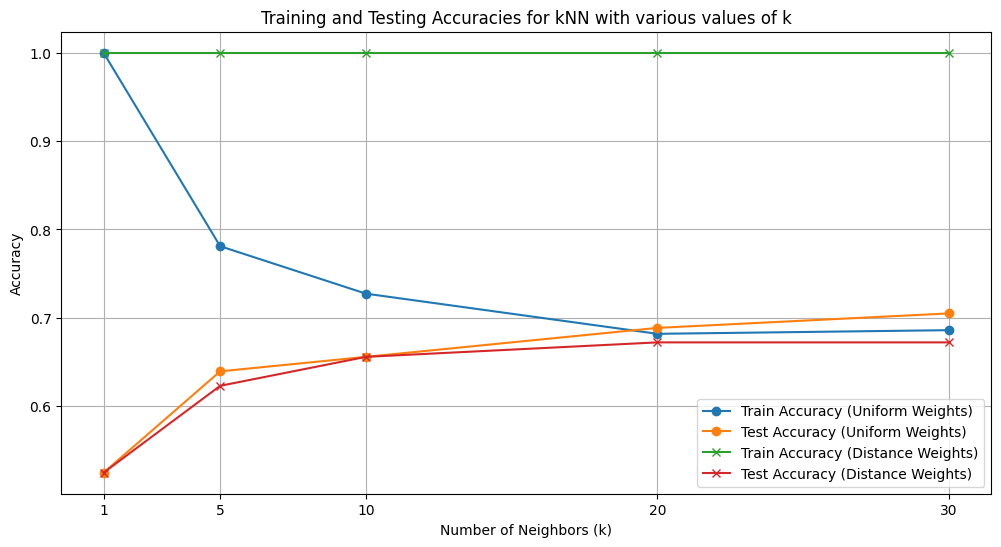

In [42]:
# Dividir os dados em conjuntos de treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Valores de k para testar
k_values = [1, 5, 10, 20, 30]

# Armazenar acurácias
train_accuracies_uniform = []
test_accuracies_uniform = []
train_accuracies_distance = []
test_accuracies_distance = []

# Treinar e avaliar os modelos
for k in k_values:
    # Modelo com pesos uniformes
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    
    # Prever e calcular acurácias
    y_train_pred_uniform = knn_uniform.predict(X_train)
    y_test_pred_uniform = knn_uniform.predict(X_test)
    
    train_accuracies_uniform.append(accuracy_score(y_train, y_train_pred_uniform))
    test_accuracies_uniform.append(accuracy_score(y_test, y_test_pred_uniform))

    # Modelo com pesos baseados em distância
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    
    # Prever e calcular acurácias
    y_train_pred_distance = knn_distance.predict(X_train)
    y_test_pred_distance = knn_distance.predict(X_test)
    
    train_accuracies_distance.append(accuracy_score(y_train, y_train_pred_distance))
    test_accuracies_distance.append(accuracy_score(y_test, y_test_pred_distance))

# Criar um gráfico para visualizar as acurácias
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies_uniform, marker='o', label='Train Accuracy (Uniform Weights)')
plt.plot(k_values, test_accuracies_uniform, marker='o', label='Test Accuracy (Uniform Weights)')
plt.plot(k_values, train_accuracies_distance, marker='x', label='Train Accuracy (Distance Weights)')
plt.plot(k_values, test_accuracies_distance, marker='x', label='Test Accuracy (Distance Weights)')
plt.title("Training and Testing Accuracies for kNN with various values of k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

#### Alínea b)

Aumentar o número de vizinhos (k) num classificador kNN afeta significativamente a sua capacidade de generalização. Para valores baixos de k (por exemplo, k = 1), o modelo tende a alcançar uma elevada precisão nos dados de treino, mas corre o risco de overfitting, ao memorizar os padrões de treino e apresentar um fraco desempenho em novos dados (dados de teste). À medida que o valor de k aumenta, a precisão no conjunto de teste geralmente melhora, uma vez que o modelo considera mais vizinhos, suavizando a influência de outliers e reduzindo o ruído, o que favorece a generalização. No entanto, se o valor de k for demasiado elevado, o modelo pode sofrer de underfitting, ao perder a capacidade de capturar distinções importantes entre as classes.

A escolha dos pesos também desempenha um papel importante, especialmente para valores elevados de k. Utilizar pesos uniformes (onde todos os vizinhos contribuem de igual forma) tende a estabilizar as previsões e a manter a consistência no desempenho. Por outro lado, pesos baseados na distância (onde os vizinhos mais próximos têm maior influência) podem introduzir maior variabilidade, especialmente para valores altos de k. 

Assim, a seleção de um k ótimo, juntamente com a escolha apropriada dos pesos, é crucial para garantir o melhor desempenho de um classificador kNN.


### Exercício 3

O modelo naïve Bayes assume que todos os atributos são condicionalmente independentes, dado a classe. No entanto, no contexto de doenças cardíacas, variáveis como a idade (age), sexo (sex), pressão arterial em repouso (trestbps) e colesterol (chol) podem estar interrelacionadas, uma vez que são todos fatores de risco cardiovascular. Quando essas variáveis não são independentes, a suposição do modelo é violada, resultando em estimativas de probabilidade imprecisas e previsões menos eficazes.

Além disso, o naïve Bayes também depende da suposição de que as distribuições dos atributos seguem um padrão que o modelo consegue captar adequadamente. No conjunto de dados de doenças cardíacas, é possível que algumas variáveis apresentem assimetrias ou outliers, o que pode comprometer a precisão do modelo. Estas limitações, aliadas à presença de atributos categóricos, como tipo de dor no peito (cp) e resultado do eletrocardiograma em repouso (restecg), dificultam ainda mais a capacidade do naïve Bayes em capturar as complexas interações entre os atributos e a classe alvo.
  
Em suma, as suposições de independência condicional e a adequação/ajustamento das distribuições dos atributos são críticas para o desempenho do naïve Bayes. A presença de correlações significativas entre os fatores de risco e a possibilidade de distribuições não normais nos dados podem levar a previsões imprecisas, sublinhando a necessidade de uma análise cuidadosa do dataset antes de aplicar este modelo.
